
# Datetime features to capture seasonality
Feature Engineering for Time Series Forecasting

In this notebook we will show how to create features from the calendar and time (e.g, day of the week, month of the year, hour of day) to help capture seasonality. We will also show how we can use these features when creating a forecast.

This is a prerequisite for creating seasonal dummy features, shown in the next lecture.

Later in the course, we have a whole section dedicated to extracting features from date and time where we cover this topic in even more depth.

In [1]:
import datetime
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context('talk')


## Data set synopsis
We will use the Victoria electricity demand dataset found here: https://github.com/tidyverts/tsibbledata/tree/master/data-raw/vic_elec. This dataset is used in the original MSTL paper [1]. It is the total electricity demand at a half hourly granularity for the state of Victora in Australia from 2002 to the start of 2015. A more detailed description of the dataset can be found here.

We resampled the dataset to hourly in the 4th data preparation notebook in the "01-Create-Datasets" folder in this repo. For instructions on how to download, prepare, and store the dataset, refer to notebook number 4, in the folder "01-Create-Datasets" from this repo.

## References
[1] K. Bandura, R.J. Hyndman, and C. Bergmeir (2021) MSTL: A Seasonal-Trend Decomposition Algorithm for Time Series with Multiple Seasonal Patterns. arXiv preprint arXiv:2107.13462.

## Load data

In [2]:
data = pd.read_csv('../datasets/victoria_electricity_demand.csv',
                   usecols=['demand', 'date_time'],
                   parse_dates=['date_time'],
                   index_col=['date_time'],)

In [3]:
data.shape

(115368, 1)

## Plot the data

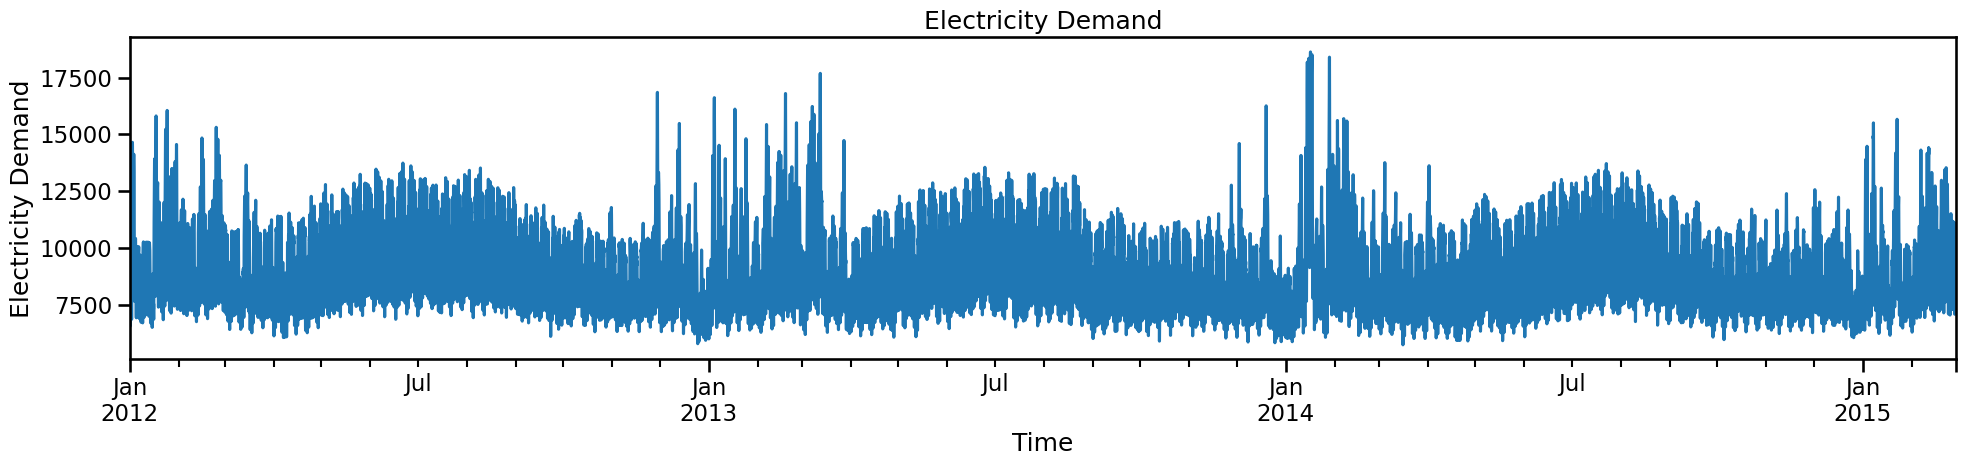

In [5]:
fig, ax = plt.subplots(figsize=(20, 5))

data.loc['2012':].plot(y='demand', legend=None, ax=ax)
ax.set_xlabel('Time')
ax.set_ylabel('Electricity Demand')
ax.set_title('Electricity Demand')
plt.tight_layout()

## Creating datetime features with sktime
Datetime features are covered in depth in the `Time Features` section of the course. In that section we show how to create these features in `Pandas` and `Feature-engine`. In this section we show how to create these features using the `DateTimeFeatures` transformer in `sktime`.

In [6]:
from sktime.transformations.series.date import DateTimeFeatures

In [7]:
transformer = DateTimeFeatures(
    ts_freq='H',    # frequency of the time series
    feature_scope='comprehensive',  # can be `comprehensive`, `efficient`, `minimal`. Depending on the time series frequency a sensible set is automatically chosen
    keep_original_columns=True
)

transformer.fit(data)

result = transformer.transform(data)
result.head()

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\transformations\series\date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(
c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\transformations\series\date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(


,demand,year,quarter_of_year,month_of_year,week_of_year,day_of_year,month_of_quarter,week_of_quarter,day_of_quarter,week_of_month,day_of_month,day_of_week,hour_of_day,hour_of_week,is_weekend
date_time,,,,,,,,,,,,,,,
2002-01-01 00:00:00,6919.366092,2002,1,1,1,1,1,2,1,1,1,1,0,24,0
2002-01-01 01:00:00,7165.974188,2002,1,1,1,1,1,2,1,1,1,1,1,25,0
2002-01-01 02:00:00,6406.542994,2002,1,1,1,1,1,2,1,1,1,1,2,26,0
2002-01-01 03:00:00,5815.537828,2002,1,1,1,1,1,2,1,1,1,1,3,27,0
2002-01-01 04:00:00,5497.732922,2002,1,1,1,1,1,2,1,1,1,1,4,28,0


We can also manually select the datetime features we want to create using the `manual_selection` argument.

The valid set of values for `manual_selection` for the most recent version of sktime during the creation of this notebook is:
* year
* quarter_of_year
* month_of_year
* week_of_year
* day_of_year
* month_of_quarter
* week_of_quarter
* day_of_quarter
* week_of_month
* day_of_month
* day_of_week
* hour_of_day
* minute_of_hour
* second_of_minute
* millisecond_of_second
* is_weekend

In [8]:
# specify which datetime features to create
datetime_features = [
    'year',
    'month_of_year',
    'week_of_year',
    'day_of_year',
    'day_of_week',
    'hour_of_day',
    'is_weekend'
]

# create DateTimeFeatures transformer
transformer = DateTimeFeatures(
    manual_selection=datetime_features,
    keep_original_columns=True
)

# fit and transform to create our features
result = transformer.fit_transform(data)
result

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\transformations\series\date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(
c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\transformations\series\date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(


,demand,year,month_of_year,week_of_year,day_of_year,day_of_week,hour_of_day,is_weekend
date_time,,,,,,,,
2002-01-01 00:00:00,6919.366092,2002,1,1,1,1,0,0
2002-01-01 01:00:00,7165.974188,2002,1,1,1,1,1,0
2002-01-01 02:00:00,6406.542994,2002,1,1,1,1,2,0
2002-01-01 03:00:00,5815.537828,2002,1,1,1,1,3,0
2002-01-01 04:00:00,5497.732922,2002,1,1,1,1,4,0
...,...,...,...,...,...,...,...,...
2015-02-28 19:00:00,9596.777060,2015,2,9,59,5,19,1
2015-02-28 20:00:00,8883.230296,2015,2,9,59,5,20,1
2015-02-28 21:00:00,8320.260550,2015,2,9,59,5,21,1


## Plots to understand seasonality
Let's quickly look at the average by different periods (daily, weekly, yearly, etc.) to remind ourselves of the seasonality. There isn't much trend in this data so we won't be too concerned about not de-trending the data first.

For a full exploratory data analysis of seasonality in this dataset see notebook `06-MSTL-decomposition.ipynb` in the `04-Time-Series-Decomposition` section of this repo.

Text(0.5, 1.0, 'Mean electricity demand vs hour of day')

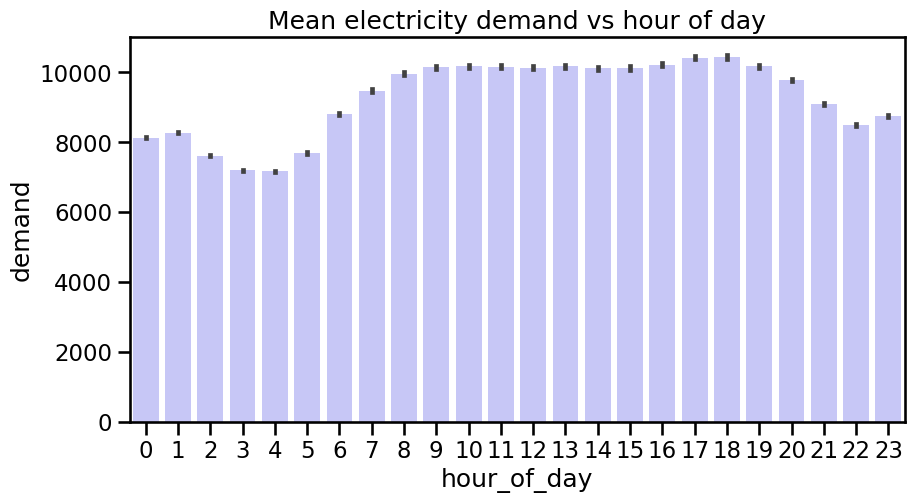

In [9]:
# plot average demand by hour of day
# to understand daily seasonality
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(data=result, y='demand', x='hour_of_day', ax=ax, color='b', alpha=0.25)
ax.set_title('Mean electricity demand vs hour of day')

<Axes: xlabel='day_of_week', ylabel='demand'>

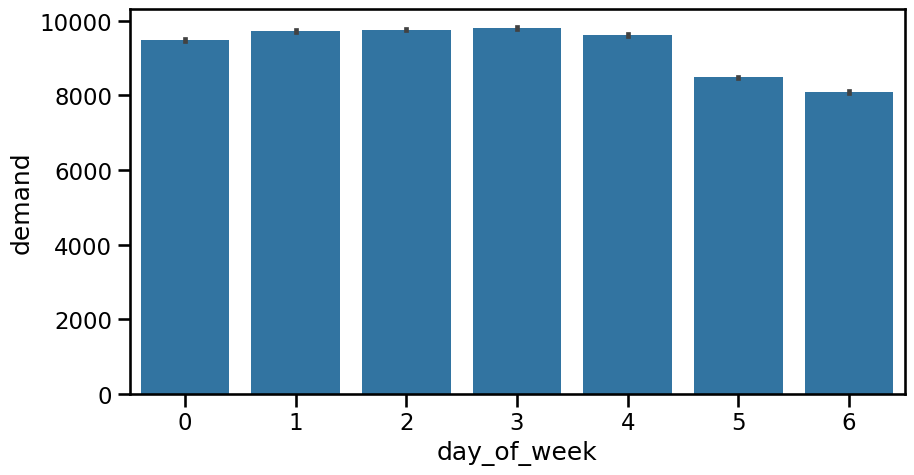

In [10]:
# Plot average demand by day of week
# to understand weekly seasonality
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=result,
            y='demand',
            x='day_of_week',
            ax=ax)

<Axes: xlabel='month_of_year', ylabel='demand'>

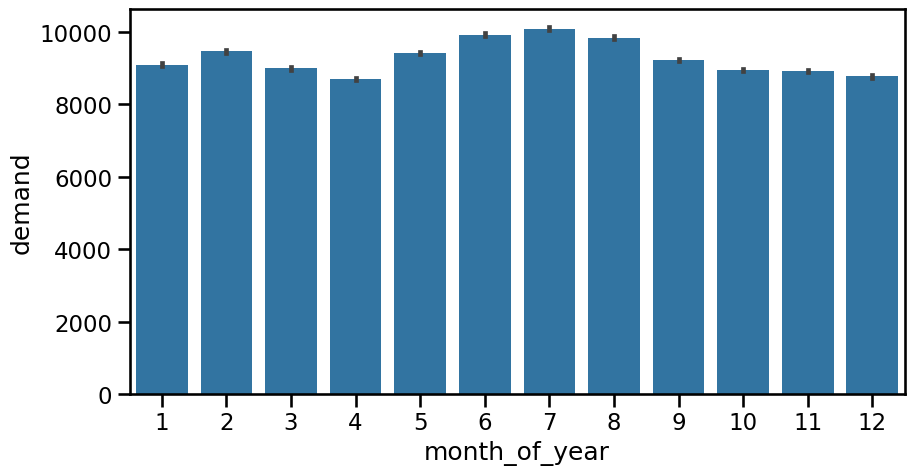

In [11]:
# Plot average demand by month of year
# to understand yearly seasonality
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=result, y='demand', x='month_of_year', ax=ax)

## Forecasting with datetime features
Let's build a recursive forecast and see how we can include datetime features in our feature engineering pipeline

In [12]:
from sktime.transformations.series.date import DateTimeFeatures
from sktime.transformations.series.summarize import WindowSummarizer
from sktime.transformations.series.time_since import TimeSince
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline, make_union
from sklearn.base import clone

from sklearn import set_config
set_config(transform_output='pandas')

In [13]:
df = data.copy()

df.head()

,demand
date_time,
2002-01-01 00:00:00,6919.366092
2002-01-01 01:00:00,7165.974188
2002-01-01 02:00:00,6406.542994
2002-01-01 03:00:00,5815.537828
2002-01-01 04:00:00,5497.732922


In [14]:
target = ['demand']

In [15]:
# prepare transformers
# polynomial time features for trend
time_feats = make_pipeline(
    TimeSince(),
    PolynomialFeatures(degree=1, include_bias=False)
)

# datetime features
datetime_features = [
    'month_of_year',
    'week_of_year',
    'day_of_year',
    'day_of_week',
    'hour_of_day'
]

datetime_feats = DateTimeFeatures(
    manual_selection=datetime_features,
    keep_original_columns=False
)

# compute lag and window features
lag_window_feats = WindowSummarizer(
    lag_feature={
        'lag': [1,2,3,4],
        # 'mean': [[1, 24], [1, 24*7]],
    },
    target_cols=target,
    truncate='bfill'
)

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\transformations\series\date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(


In [16]:
# create a pipeline
pipeline = make_union(
    datetime_feats,
    time_feats,
    lag_window_feats,
)


# apply min max scaling to all the features
pipeline = make_pipeline(pipeline, MinMaxScaler())

In [17]:
pipeline

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('datetimefeatures',
                                                 DateTimeFeatures(manual_selection=['month_of_year', 'week_of_year',
                                   'day_of_year', 'day_of_week',
                                   'hour_of_day'])),
                                                ('pipeline',
                                                 Pipeline(steps=[('timesince',
                                                                  TimeSince()),
                                                                 ('polynomialfeatures',
                                                                  PolynomialFeatures(degree=1,
                                                                                     include_bias=False))])),
                                                ('windowsummarizer',
                                                 WindowSummarizer(lag_feature={'lag': [1, 2, 3, 4]}, target_cols=['demand'],
                 truncate='bfill'))])),
                ('minmaxscaler', MinMaxScaler())])

In [18]:
pipeline.fit_transform(df.head())

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\transformations\series\date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(
c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\transformations\series\summarize.py:299: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 2 3 4]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  func_dict.loc[:, "window"] = func_dict["window"].astype("object")


,month_of_year,week_of_year,day_of_year,day_of_week,hour_of_day,time_since_2002-01-01 00:00:00,demand_lag_1,demand_lag_2,demand_lag_3,demand_lag_4
date_time,,,,,,,,,,
2002-01-01 00:00:00,0.0,0.0,0.0,0.0,0.00,0.00,0.817386,0.675273,0.0,0.0
2002-01-01 01:00:00,0.0,0.0,0.0,0.0,0.25,0.25,0.817386,0.675273,0.0,0.0
2002-01-01 02:00:00,0.0,0.0,0.0,0.0,0.50,0.50,1.000000,0.675273,0.0,0.0
2002-01-01 03:00:00,0.0,0.0,0.0,0.0,0.75,0.75,0.437640,1.000000,0.0,0.0
2002-01-01 04:00:00,0.0,0.0,0.0,0.0,1.00,1.00,0.000000,0.000000,1.0,0.0


In [19]:
# we can use clone to return an unfitted version of the pipeline
pipeline = clone(pipeline)

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\transformations\series\date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(


In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

In [22]:
# CONFIG
forecast_start_time = df.index.max() - pd.DateOffset(weeks=2)

# define number of steps to forecast
num_of_forecast_steps = 24*14

# define the model
model = LGBMRegressor(
    boosting_type='gbdt',
    learning_rate=0.1,
    n_estimators=100,
    n_jobs=-1
)

# create a list of periods that we will forecast over
forecast_horizon = pd.date_range(
    start=forecast_start_time,
    periods=num_of_forecast_steps,
    freq='H'
)

# how much data in the past is needed to create our features
look_back_window_size = pd.DateOffset(weeks=1)

C:\Users\Asus\AppData\Local\Temp\ipykernel_21644\2111323337.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_horizon = pd.date_range(


In [23]:
# CREATE TRAINING AND TESTING DATAFRAME
df_train = df.loc[df.index < forecast_start_time].copy()
df_test = df.loc[df.index >= forecast_start_time].copy()

In [24]:
# FEATURE ENGINEERING
# create X_train and y_train
y_train = df_train[target]
X_train = pipeline.fit_transform(df_train)

# LightGBM cannot handle column names which havve certain characters
# we replace these with _
if 'lightgbm' in model.__module__:
    X_train = X_train.rename(columns=lambda x: re.sub("[^A-Za-z0-9_]+", "_", x))

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\transformations\series\date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(
c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\transformations\series\summarize.py:299: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 2 3 4]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  func_dict.loc[:, "window"] = func_dict["window"].astype("object")


In [ ]:
# MODEL TRAINING
# train one-step ahead forecast model
model.fit(X_train, y_train)

LGBMRegressor(n_jobs=-1)

In [26]:
# CREATE DYNAMIC PREDICTION DATAFRAME
# We will recursively append our forecasts to this 
# dataframe and re-compute our lag and window features from the
# target in this dataframe. It contains data in both the training period 
# and forecast period which is needed for some transformers (e.g., lags and windows).
look_back_start_time = forecast_start_time - look_back_window_size

# create `df_predict` which has data going as far back as needed
# to create features which need past values
df_predict = df_train.loc[look_back_start_time:].copy()

# extend index into forecast horizon
df_predict = pd.concat(
    [df_predict, pd.DataFrame(index=forecast_horizon)]
)

In [27]:
# RECURSIVE FORECASTING LOOP
for forecast_time in forecast_horizon:
    # compute features during forecast horizon
    X_test = pipeline.transform(df_predict)
    X_test = X_test.loc[[forecast_time]]

    # predict one step ahead
    y_pred = model.predict(X_test)

    # append forecast to the target variable column in `df_predict`
    # this `df_predict` is ready for the next iteration where we will 
    # recompute features derived from the target such as lags and windows
    df_predict.loc[[forecast_time], target] = y_pred

In [28]:
# GET FORECAST AND TEST VALUES
y_forecast = df_predict.loc[forecast_horizon, target]
y_test = df_test.loc[forecast_start_time:, target]

In [29]:
# CREATE IN-SAMPLE PREDICTIONS
y_forecast_train = model.predict(X_train)
y_forecast_train = pd.DataFrame(y_forecast_train, index=X_train.index, columns=target)

Text(0.5, 1.0, 'Recursive forecast with LGBMRegressor(n_jobs=-1)')

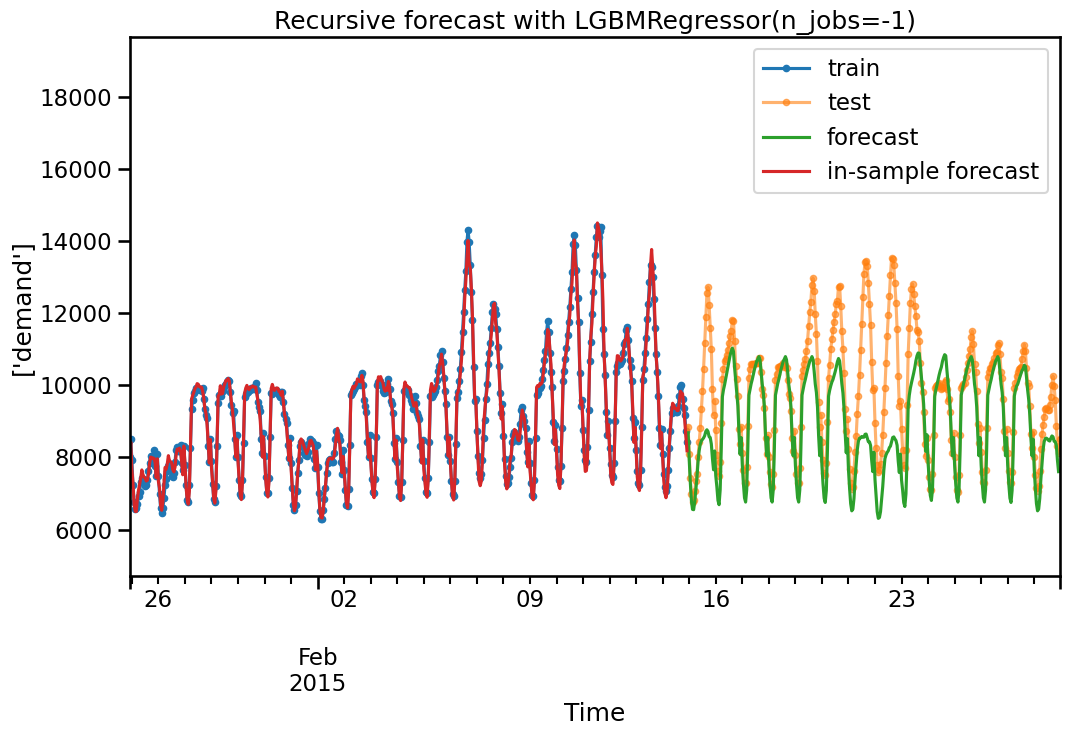

In [30]:
# PLOTTING
# Plot the forecast.
fig, ax = plt.subplots(figsize=[12, 7])

# Plot training set.
y_train.plot(ax=ax, marker='.')
# Plot actuals in forecasting horizon.
y_test.plot(ax=ax, marker='.', alpha=0.6)
# Plot forecast.
y_forecast.plot(ax=ax)
# Plot 1 step forecasts in training data.
y_forecast_train.plot(ax=ax)

ax.legend(["train", "test", "forecast", "in-sample forecast"])
ax.set_xlim(xmin=y_train.index.max() - pd.DateOffset(weeks=3))
ax.set_xlabel("Time")
ax.set_ylabel(f"{target}")
ax.set_title(f"Recursive forecast with {model}")

In [31]:
# compute RMSE
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_true=y_test.loc[y_forecast.index],
                        y_pred=y_forecast)

1401.9957896569902